In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
DATA_DIR = '../data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [3]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

## Executar a redução de dimensionalidade em x, y e z com PCA:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_train[['x','y','z']])
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
X_train.drop(['x','y','z'], axis=1, inplace=True)

### Padronizar os recursos numéricos:

In [6]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

### Construindo o MLP para prever os preços dos Diamantes

In [7]:
from keras.models import Sequential
nn_reg = Sequential()

In [8]:
from keras.layers import Dense


In [9]:
n_input = X_train.shape[1]
n_hidden1 = 32
nn_reg.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))

C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **units:** Este é o número de neurônios na camada; estamos usando 32
- **activation:** Esta é a função de ativação que será utilizada em cada um dos neurônios; estamos usando ReLU
- **input_shape:** Este é o número de entradas que a rede receberá, que é igual ao número de recursos preditivos em nosso conjunto de dados; não precisamos especificar quantas amostras a rede receberá, pois ela pode lidar com qualquer número delas

In [10]:
n_hidden2 = 16
n_hidden3 = 8
# add second hidden layer
nn_reg.add(Dense(units=n_hidden2, activation='relu'))
# add third hidden layer
nn_reg.add(Dense(units=n_hidden3, activation='relu'))

In [11]:
# output layer
nn_reg.add(Dense(units=1, activation=None))

### Training the neural network

In [12]:
nn_reg.compile(loss='mean_squared_error', optimizer='adam')

- Compilando o Modelo e informando ao Keras a função de perda e o otimizador escolhido que no caso é o 'adam'

In [13]:
nn_reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

- Ha cerca de 1,377 pesos e vieses no modelo
- Podemos treinar o modelo usando o FIT metodo

In [14]:
batch_size = 64
n_epochs = 50
nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - loss: 25463518.0000
Epoch 2/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 1951164.7500
Epoch 3/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1253986.1250
Epoch 4/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 981956.8750
Epoch 5/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 867890.3750
Epoch 6/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 811145.8750
Epoch 7/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 701097.8750
Epoch 8/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 665268.8750
Epoch 9/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 624615.6250
Epoch 10/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 639208.8125
Epoch 11/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 644830.6250
Epoch 12/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 563605.0625
Epoch 13/50
759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 591252.0000
Epoch 14/50
759/759 ━━━━━━━━━━

## Transformando e Dimensionando o conjunto de dados de teste

In [15]:
## PCA para redução de dimensão: 
X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten() 
X_test.drop(['x','y','z'], axis=1, inplace=True) 
## Dimensione nossos recursos numéricos para que tenham média zero e uma variação de um 
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

### Fazendo previsões usando o **predict** método e calculando o MSE:

In [16]:
from sklearn.metrics import mean_squared_error
y_pred_train = nn_reg.predict(X_train)
y_pred_test = nn_reg.predict(X_test)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
print("Train MSE: {:0.3f} \nTest MSE: {:0.3f}".format(train_mse/1e6, test_mse/1e6))

1517/1517 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
Train MSE: 0.315 
Test MSE: 0.326


## Regularizando 

In [17]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))

C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [19]:
nn_reg2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,273 (87.00 KB)

 Trainable params: 22,273 (87.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1)

Epoch 1/300
683/683 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 11223812.0000 - mae: 1852.7573 - mse: 11223812.0000 - val_loss: 968167.9375 - val_mae: 506.9034 - val_mse: 968167.9375
Epoch 2/300
683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 813038.0000 - mae: 459.5571 - mse: 813038.0000 - val_loss: 651288.3750 - val_mae: 401.2252 - val_mse: 651288.3750
Epoch 3/300
683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 597961.3125 - mae: 406.1181 - mse: 597961.3125 - val_loss: 562879.9375 - val_mae: 390.4895 - val_mse: 562879.9375
Epoch 4/300
683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 476444.0625 - mae: 370.3472 - mse: 476444.0625 - val_loss: 480787.0000 - val_mae: 370.2100 - val_mse: 480787.0000
Epoch 5/300
683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 433182.3438 - mae: 362.7808 - mse: 433182.3438 - val_loss: 423164.5938 - val_mae: 356.0971 - val_mse: 423164.5938
Epoch 6/300
683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - loss: 366841.4062 - mae: 339.1308 - mse: 366841.4062 

In [21]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


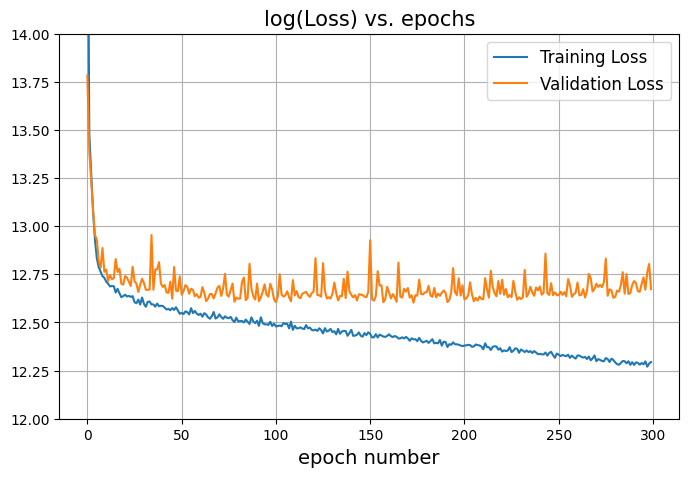

In [22]:
cfig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();